# Sentiment Analysis of IMDB Movie Reviews

This project performs **binary sentiment classification** (positive vs negative)
on IMDB movie reviews using classical Natural Language Processing (NLP) techniques
and Machine Learning.

**Key steps:**
- Importing required libraries 
- Loading dataset
- Creating a pandas dataframe
- Text preprocessing
- Feature extraction using TF-IDF
- Split data into train and test sets
- Base model (Logistic Regression) training and performance evaluation
- Multinomial Naive Bayes training and performance evaluation

## 1. Importing Required Libraries

In [1]:
# ====================
#    Data handling
# ====================
import pandas as pd
import numpy as np

# ====================
#    Visualization
# ====================
# Plotting library for charts and graphs
import matplotlib.pyplot as plt 
# Statistical data visualization built on matplotlib
import seaborn as sns                    

# ====================
# NLP & preprocessing
# ====================
# Core NLP library
import nltk   
# Common words to remove (e.g., "the", "is")
from nltk.corpus import stopwords  
# Splits text into individual words (tokens)
from nltk.tokenize import word_tokenize  

# ====================
#   Machine Learning
# ====================
from sklearn.model_selection import train_test_split
# Converts text into numerical feature vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [2]:
# To ensure NLP tools work correctly
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /Users/mahsa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/mahsa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mahsa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/mahsa/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

## 2. Loading IMDB Dataset from NLTK

In [3]:
# ===============================
# Load IMDB movie reviews dataset
# ===============================
# Note: The dataset is tokenized by nltk
from nltk.corpus import movie_reviews

## 3. Create a Pandas Dataframe

In [4]:
import random
# Create a list of (review_text, sentiment_label)
# 'pos' = positive review, 'neg' = negative review
documents = []
# Loop through each sentiment category ('pos', 'neg'), then through each review file
# belonging to that category. Each review is provided as a list of tokenized words,
# which are joined into a single string to reconstruct the full review text.
# The resulting text is paired with its corresponding sentiment label.
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        review_text = ' '.join(movie_reviews.words(fileid))
        documents.append((review_text, category))

# Shuffle the dataset to avoid any ordering bias
random.shuffle(documents)

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(documents, columns=['review', 'label'])

# Preview the dataset
df.head()

,review,label
0,"you don ' t need to have seen the original "" s...",neg
1,a fully loaded entertainment review - website ...,pos
2,life is beautiful is a rare treat : a lighthea...,pos
3,when the film features richard lynch in the ro...,neg
4,"i looked at the "" internet movie database "" ' ...",neg


### Dataset Sanity Check

In [5]:
# Check dataset size and class distribution
print("Dataset shape:", df.shape)
print(df['label'].value_counts())

Dataset shape: (2000, 2)
label
neg    1000
pos    1000
Name: count, dtype: int64


## 4. Text Preprocessing <br>
We need to:
1. Convert all text to lowercase
2. Tokenize the text → break into words
3. Remove stopwords → common words like “the”, “is”, “and”
4. Remove non-alphabetic tokens → punctuation, numbers
5. Join tokens back into a cleaned string

In [6]:
# ===============================
# Text Preprocessing Function
# ===============================

# Get list of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Cleans raw text by:
    1. Lowercasing
    2. Tokenizing into words
    3. Removing stopwords
    4. Removing non-alphabetic tokens
    5. Returning a cleaned string
    """
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Reconstruct cleaned text
    return ' '.join(tokens)


### Apply Preprocessing 

In [7]:
# Apply preprocessing to all reviews
# Create a new column in the dataframe and add the processed data
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Preview the first 5 original vs cleaned reviews
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,"you don ' t need to have seen the original "" s...",need seen original species appreciate utterly ...
1,a fully loaded entertainment review - website ...,fully loaded entertainment review website comi...
2,life is beautiful is a rare treat : a lighthea...,life beautiful rare treat lighthearted comedy ...
3,when the film features richard lynch in the ro...,film features richard lynch role chief villain...
4,"i looked at the "" internet movie database "" ' ...",looked internet movie database awards section ...


In [8]:
# Check dataset size and class distribution again
print("Dataset shape:", df.shape)
print(df['label'].value_counts())


Dataset shape: (2000, 3)
label
neg    1000
pos    1000
Name: count, dtype: int64


## 5. TF-IDF Vectorization

**Goal:**

Convert the cleaned_review text into numerical features that a machine learning model can understand.


**Common techniques:**
1. **Bag of Words (BoW):** Counts how many times each word appears in a document. Simple, but treats all words equally and ignores word importance.  
2. **TF-IDF (Term Frequency – Inverse Document Frequency):** Also counts words, but **weights them by importance**. Words that appear frequently in a document but rarely across all documents get higher weights.  

In this project, TF-IDF is used for feature extraction because it: 
- Reduces the influence of common, uninformative words (like "movie", "film").  
- Helps the model focus on words that are more indicative of sentiment.  
- Generally gives better performance for text classification tasks like sentiment analysis.


In [9]:
# ===============================
# Feature Extraction using TF-IDF
# ===============================

from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Limits to top 2000 words


### Fit and Transform

In [10]:
# Fit TF-IDF to the cleaned reviews and transform text into numerical vectors
X = tfidf_vectorizer.fit_transform(df['cleaned_review'])
# Target labels
y = df['label']

In [11]:
# Check the data 
print('Feature matrix shape (num_reviews, num_features):', X.shape)
print('\n')
print('Label distribution:\n' , y.value_counts())

Feature matrix shape (num_reviews, num_features): (2000, 2000)


Label distribution:
 label
neg    1000
pos    1000
Name: count, dtype: int64


## 6. Split Data into Training and Test Sets

In [12]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets (80% training an 20% test)
# random_state=42 ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and test sets 
print("Training set shape (num_reviews, num_features):", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing set shape (num_reviews, num_features):", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training set shape (num_reviews, num_features): (1600, 2000)
Training labels shape: (1600,)
Testing set shape (num_reviews, num_features): (400, 2000)
Testing labels shape: (400,)


## 7. Base Model Training and Performance Evaluation

### Logistic Regression 

**Training**

In [13]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_regression_classifier = LogisticRegression(random_state=0, max_iter=1000)

# Train the model using the training set
logistic_regression_classifier.fit(X_train, y_train)

# Check training accuracy
print(f"Training accuracy: {logistic_regression_classifier.score(X_train, y_train):.4f}")

Training accuracy: 0.9525


**Performance Evaluation**

In [14]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = logistic_regression_classifier.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Test Accuracy: {test_accuracy_lr:.4f}")
print("------------------------------- " )
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Test Accuracy: 0.8450
------------------------------- 
Classification Report:
               precision    recall  f1-score   support

         neg       0.84      0.85      0.84       196
         pos       0.85      0.84      0.85       204

    accuracy                           0.84       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.85      0.84      0.85       400



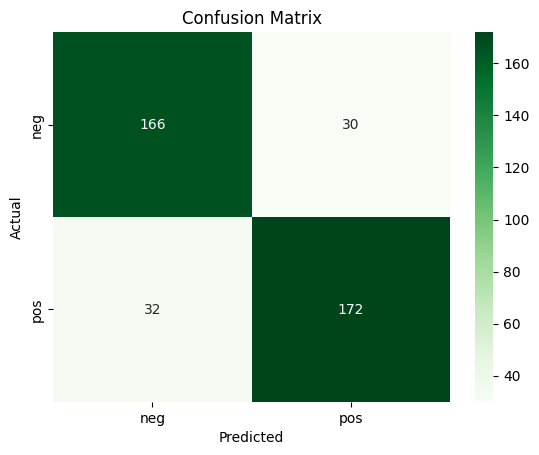

In [15]:
from sklearn.metrics import confusion_matrix

logistic_regression_cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(logistic_regression_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 8. Multinomial Naive Bayes training and performance evaluation

So far, we trained and evaluated a Logistic Regression model as a baseline for sentiment classification.
In this section, we introduce **Multinomial Naive Bayes**, a probabilistic model that is widely used
for text classification tasks.

Multinomial Naive Bayes is particularly well-suited for Natural Language Processing problems because
it works with **count-based and frequency-based features**, such as Bag-of-Words and TF-IDF
representations.

The goal of this step is to:
- Train a Multinomial Naive Bayes classifier using the same TF-IDF features
- Evaluate its performance on the test set
- Compare its results with the Logistic Regression baseline


In [39]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
print(f"Training Accuracy: {naive_bayes_classifier.score(X_train, y_train):.4f}")

Training Accuracy: 0.9012


In [40]:
y_pred_nb = naive_bayes_classifier.predict(X_test)
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Test Accuracy: {test_accuracy_nb:.4f}")
print("------------------------------- " )
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Test Accuracy: 0.8125
------------------------------- 
Classification Report:
               precision    recall  f1-score   support

         neg       0.78      0.86      0.82       196
         pos       0.85      0.77      0.81       204

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



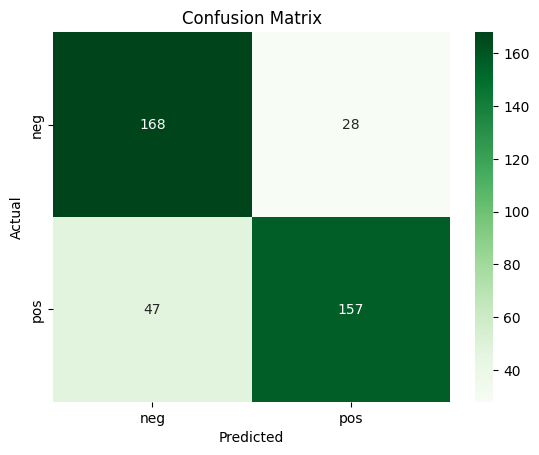

In [41]:
naive_byes_cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(naive_byes_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()